Importing Necessary Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Data Scrapping

In [ ]:

P_Name = []
P_Matches = []
P_Innings = []
P_Number = []
P_Runs = []
P_Highest = []
P_Average = []
P_Best_Figure = []
P_Strike_Rate = []
P_Hundreds = []
P_Fifties = []
P_Fours = []
P_Sixes = []



for i in range(11,21):
    
    URL = 'https://www.iplt20.com/stats/20{}/most-runs'.format(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for i in soup.find_all('div',class_='top-players__player-name'):
      a = i.text
      P_Name.append(a.strip().replace("\n",'').replace(" ",'',27))

    for i in soup.find_all('td',class_="top-players__m top-players__padded "):
      b = i.text
      P_Matches.append(b)

    for i in soup.find_all('td',class_="top-players__inns"):
      c = i.text
      P_Innings.append(c)

    for i in soup.find_all('td',class_="top-players__no"):
      d = i.text
      P_Number.append(d)

    for i in soup.find_all('td',class_="top-players__r is-active"):
      e = i.text
      P_Runs.append(e)

    for i in soup.find_all('td',class_="top-players__hs"):
      f = i.text
      P_Highest.append(f)

    for i in soup.find_all('td',class_="top-players__a"):
      g = i.text
      P_Average.append(g)

    for i in soup.find_all('td',class_="top-players__b"):
      h = i.text
      P_Best_Figure.append(h)

    for i in soup.find_all('td',class_="top-players__sr"):
      i1 = i.text
      P_Strike_Rate.append(i1)

    for i in soup.find_all('td',class_="top-players__100s"):
      j = i.text
      P_Hundreds.append(j)

    for i in soup.find_all('td',class_="top-players__50s"):
      k = i.text
      P_Fifties.append(k)

    for i in soup.find_all('td',class_="top-players__4s"):
      l = i.text
      P_Fours.append(l)

    for i in soup.find_all('td',class_="top-players__6s"):
      m = i.text
      P_Sixes.append(m)
      

In [ ]:
print(len(P_Name))
print(len(P_Matches))
print(len(P_Innings ))
print(len(P_Number ))
print(len(P_Runs ))
print(len(P_Highest ))
print(len(P_Average ))
print(len(P_Best_Figure ))
print(len(P_Strike_Rate ))
print(len(P_Hundreds ))
print(len(P_Fifties ))
print(len(P_Fours))
print(len(P_Sixes ))

1405
1405
1405
1405
1405
1405
1405
1405
1405
1405
1405
1405
1405


Creating Data Frame From The Scrapped Data

In [ ]:
df = pd.DataFrame({"Player's Name" : P_Name,
                   "Player's Matchs" : P_Matches,
                   "Player's Innings" : P_Innings,
                   "Player's Runs" : P_Runs,
                   "Player's Highest" : P_Highest,
                   "Player's Average" : P_Average,
                   "Player's Best Figures" : P_Best_Figure,
                   "Player's Strike Rate" : P_Strike_Rate,
                   "Player's Hundrerds" : P_Hundreds,
                   "Player's Fifties" : P_Fifties,
                   "Playre's Fours" : P_Fours,
                   "Player's sixes" : P_Sixes}) 

In [ ]:
df

,Player's Name,Player's Matchs,Player's Innings,Player's Runs,Player's Highest,Player's Average,Player's Best Figures,Player's Strike Rate,Player's Hundrerds,Player's Fifties,Playre's Fours,Player's sixes
0,Chris Gayle,\n 12\n,\n 12\n,\n 608\n,\n 107\n,\n 67.55\n,\n 332\n,\n 183.13\n,\n 2\n,\n 3\n,\n 57\n,\n 44\n
1,Virat Kohli,\n 16\n,\n 16\n,\n 557\n,\n 71\n,\n 46.41\n,\n 460\n,\n 121.08\n,\n 0\n,\n 4\n,\n 55\n,\n 16\n
2,Sachin Tendulkar,\n 16\n,\n 16\n,\n 553\n,\n 100*\n,\n 42.53\n,\n 488\n,\n 113.31\n,\n 1\n,\n 2\n,\n 67\n,\n 5\n
3,Shaun Marsh,\n 14\n,\n 13\n,\n 504\n,\n 95\n,\n 42.00\n,\n 344\n,\n 146.51\n,\n 0\n,\n 4\n,\n 52\n,\n 20\n
4,Michael Hussey,\n 14\n,\n 14\n,\n 492\n,\n 83*\n,\n 41.00\n,\n 414\n,\n 118.84\n,\n 0\n,\n 4\n,\n 53\n,\n 6\n
...,...,...,...,...,...,...,...,...,...,...,...,...
1400,Khaleel Ahmed,\n 7\n,\n 1\n,\n 0\n,\n 0*\n,\n 0.00\n,\n 2\n,\n 0.00\n,\n 0\n,\n 0\n,\n 0\n,\n 0\n
1401,Arshdeep Singh,\n 8\n,\n 1\n,\n 0\n,\n 0*\n,\n 0.00\n,\n 3\n,\n 0.00\n,\n 0\n,\n 0\n,\n 0\n,\n 0\n
1402,Daniel Sams,\n 3\n,\n 1\n,\n 0\n,\n 0*\n,\n 0.00\n,\n 2\n,\n 0.00\n,\n 0\n,\n 0\n,\n 0\n,\n 0\n
1403,Shreevats Goswami,\n 2\n,\n 2\n,\n 0\n,\n 0*\n,\n 0.00\n,\n 4\n,\n 0.00\n,\n 0\n,\n 0\n,\n 0\n,\n 0\n


Filtering The Data Set

In [ ]:

df["Player's Matchs"] = df["Player's Matchs"].apply(lambda x:x.replace('\n','')).astype(int)
df["Player's Innings"] = df["Player's Innings"].apply(lambda x:x.replace('\n','')).astype(int)
df["Player's Runs"] = df["Player's Runs"].apply(lambda x:x.replace('\n','')).astype(int)
df["Player's Highest"] = df["Player's Highest"].apply(lambda x:x.replace('\n','').replace('*','')).astype(int)
df["Player's Average"] = df["Player's Average"].apply(lambda x:x.replace('\n',''))
df["Player's Best Figures"] = df["Player's Best Figures"].apply(lambda x:x.replace('\n','')).astype(int)
df["Player's Strike Rate"] = df["Player's Strike Rate"].apply(lambda x:x.replace('\n','')).astype(float)
df["Player's Hundrerds"] = df["Player's Hundrerds"].apply(lambda x:x.replace('\n','')).astype(int)
df["Player's Fifties"] = df["Player's Fifties"].apply(lambda x:x.replace('\n','')).astype(int)
df["Playre's Fours"] = df["Playre's Fours"].apply(lambda x:x.replace('\n','')).astype(int)
df["Player's sixes"] = df["Player's sixes"].apply(lambda x:x.replace('\n','')).astype(int)


In [ ]:
df["Player's Average"] = pd.to_numeric(df["Player's Average"],errors='coerce')

Droping the Unecessary Rows

In [ ]:
df.drop(df.index[1000:], inplace = True)
df

,Player's Name,Player's Matchs,Player's Innings,Player's Runs,Player's Highest,Player's Average,Player's Best Figures,Player's Strike Rate,Player's Hundrerds,Player's Fifties,Playre's Fours,Player's sixes
0,Chris Gayle,12,12,608,107,67.55,332,183.13,2,3,57,44
1,Virat Kohli,16,16,557,71,46.41,460,121.08,0,4,55,16
2,Sachin Tendulkar,16,16,553,100,42.53,488,113.31,1,2,67,5
3,Shaun Marsh,14,13,504,95,42.00,344,146.51,0,4,52,20
4,Michael Hussey,14,14,492,83,41.00,414,118.84,0,4,53,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Jos Buttler,13,13,548,95,54.80,353,155.24,0,5,52,21
996,Virat Kohli,14,14,530,92,48.18,381,139.10,0,4,52,18
997,Suryakumar Yadav,14,14,512,72,36.57,384,133.33,0,4,61,16
998,Dinesh Karthik,16,16,498,52,49.80,337,147.77,0,2,49,16


EDA Begains Here

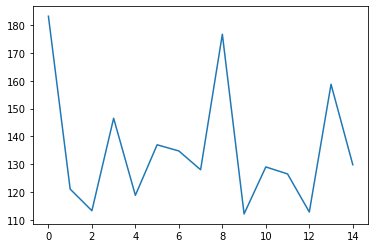

In [ ]:
plt.plot(df.iloc[0:15,7:8])
plt.show()

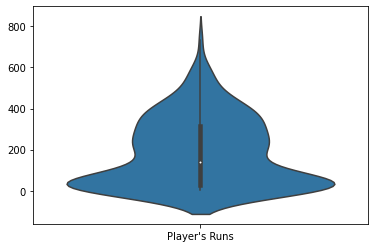

In [ ]:
sns.violinplot(data=df.iloc[:200,3:4])
plt.show()

Text(0.5, 0, "Player's stats")

Text(0, 0.5, 'Density')

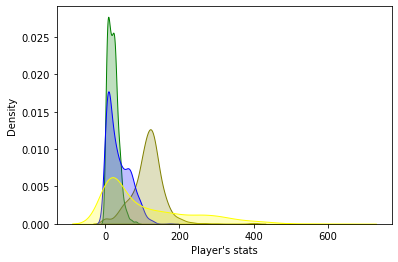

In [ ]:
sns.kdeplot(x= "Player's Strike Rate", shade=True, Label='IPL', color='olive', data = df)
sns.kdeplot(x = "Player's Average", shade=True, Label='IPL', color='green', data = df)
sns.kdeplot(x = "Player's Highest", shade=True, Label='IPL', color='blue', data = df)
sns.kdeplot(x = "Player's Best Figures", shade=True, Label='IPL', color='yellow', data = df)
plt.xlabel("Player's stats")
plt.ylabel('Density')
plt.show()

Text(0.5, 0, 'Number of four')

Text(0, 0.5, 'Number of times')

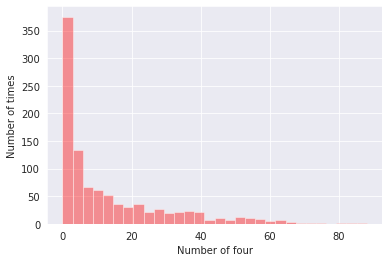

In [ ]:
sns.set_style('darkgrid')
sns.distplot(df["Playre's Fours"], kde = False, color ='red', bins = 30)
plt.xlabel("Number of four")
plt.ylabel('Number of times')

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

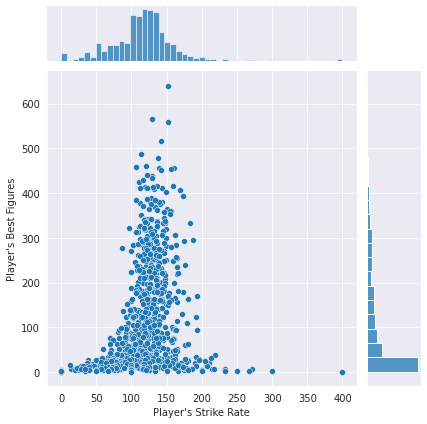

In [ ]:
plt.figure(figsize=(5, 5))
sns.jointplot(x = df["Player's Strike Rate"], y = df["Player's Best Figures"], data = df)

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

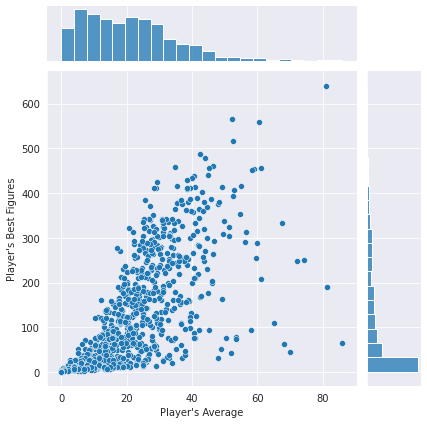

In [ ]:
plt.figure(figsize=(5, 5))
sns.jointplot(x = df["Player's Average"], y = df["Player's Best Figures"], data = df)

<Figure size 504x504 with 0 Axes>

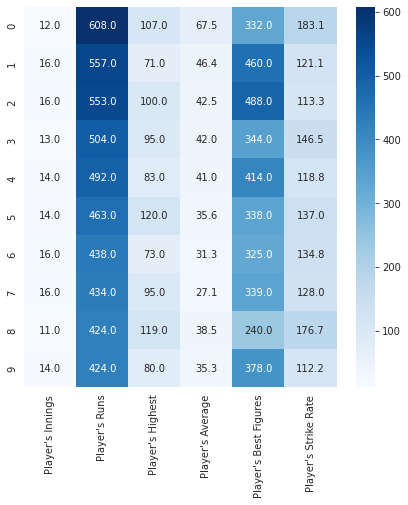

In [ ]:
plt.figure(figsize=(7, 7))
p1 = sns.heatmap(data = df.iloc[:10,2:8], fmt=".1f",annot=True, cmap="Blues")
plt.show()

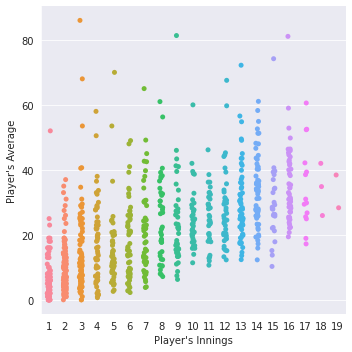

In [ ]:
sns.catplot(x = "Player's Innings", y = "Player's Average", data = df,  legend = True)
plt.show()

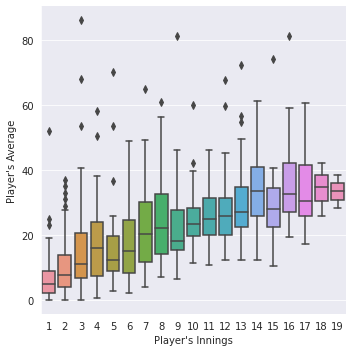

In [ ]:
sns.catplot(x = "Player's Innings", y = "Player's Average", data = df,  legend = True, kind = "box")
plt.show()

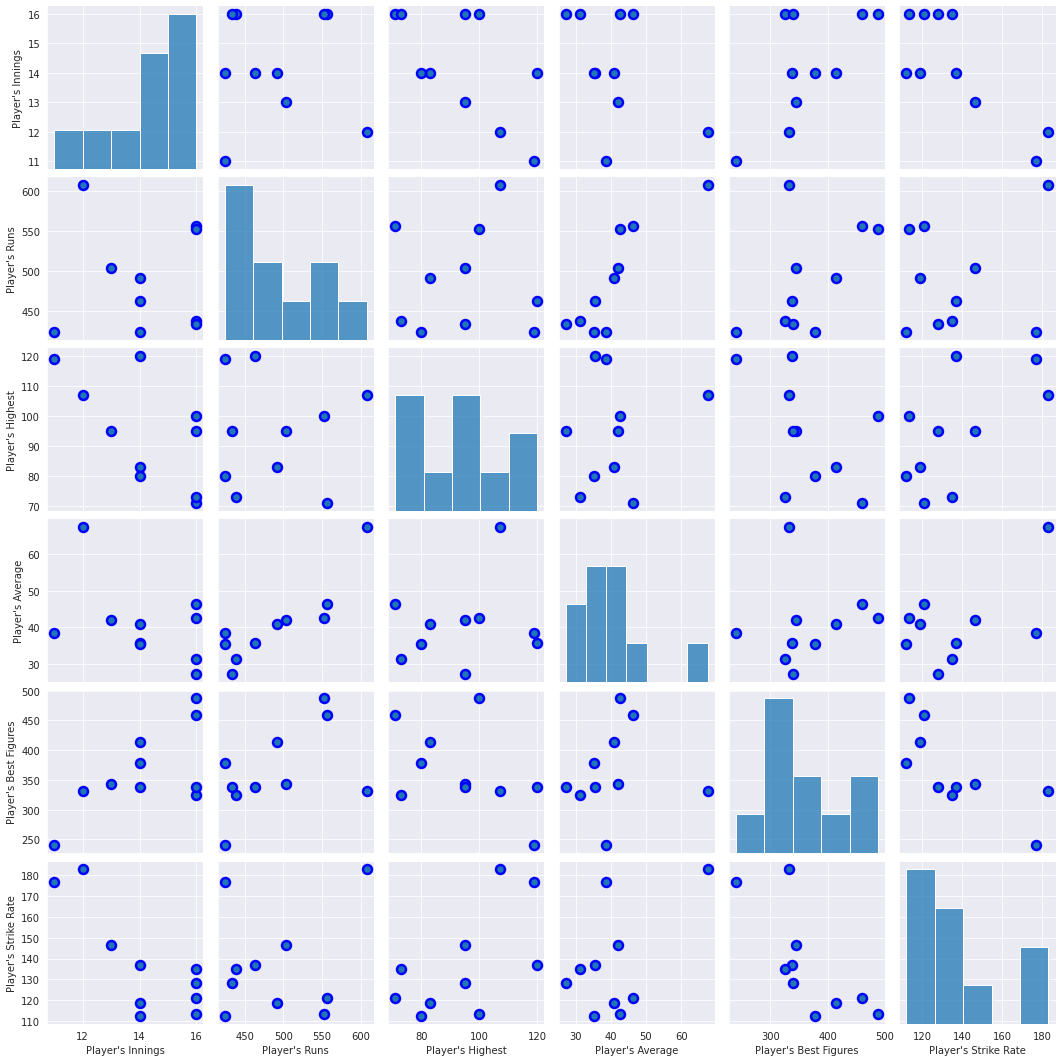

In [ ]:
sns.pairplot(df.iloc[0:10,2:8], kind="scatter", plot_kws=dict(s=80, edgecolor="blue", linewidth=2.5))
plt.show()

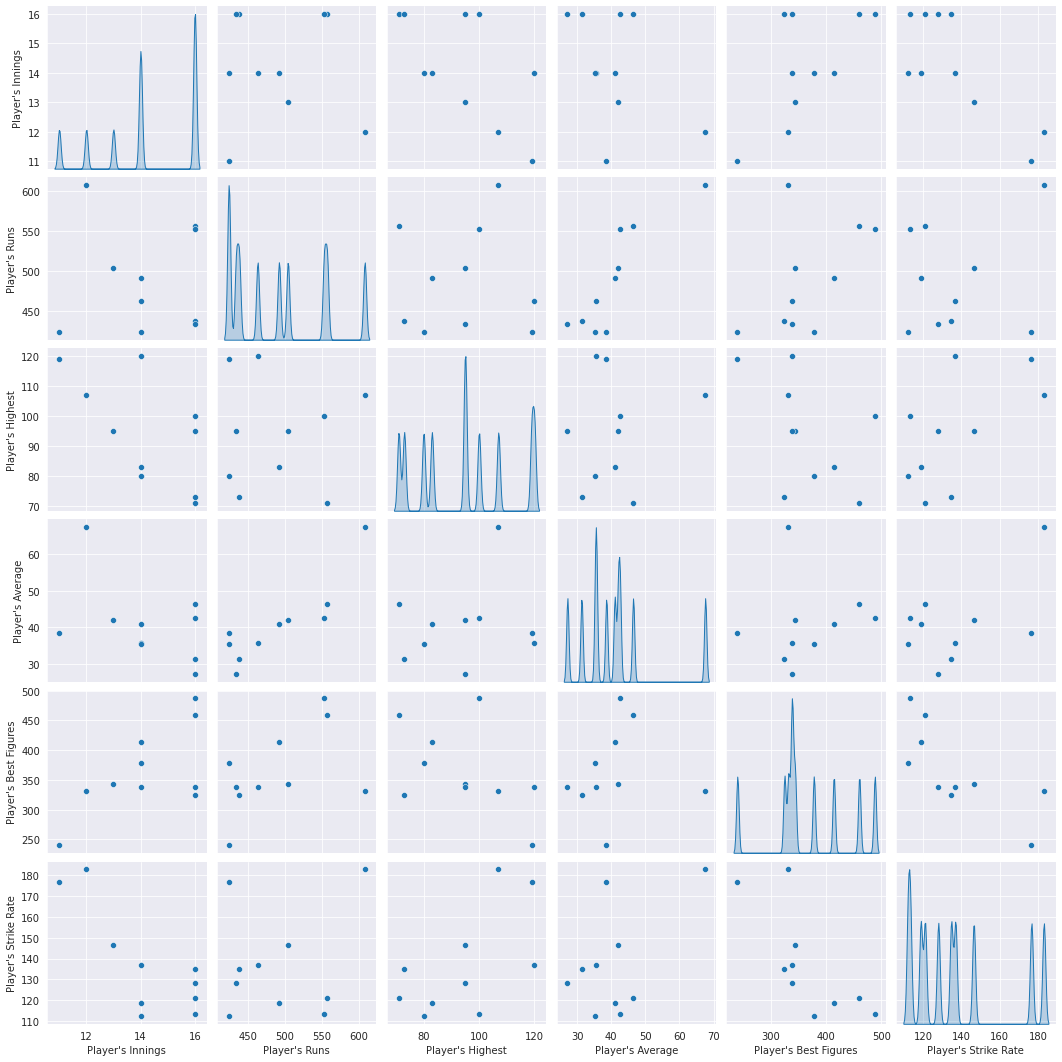

In [ ]:
sns.pairplot(df.iloc[0:10,2:8], diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=.05, vertical=False) )

plt.show()

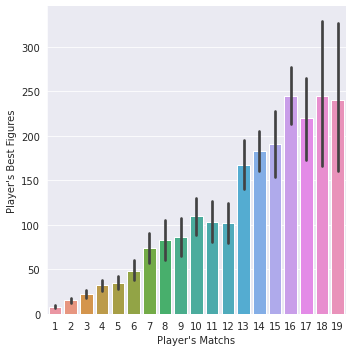

In [ ]:
sns.catplot(x = "Player's Matchs", y = "Player's Best Figures", data = df, kind = "bar")
plt.show()

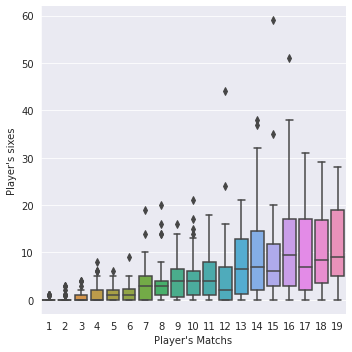

In [ ]:
sns.catplot(x = "Player's Matchs", y = "Player's sixes", data = df, kind = "box")
plt.show()

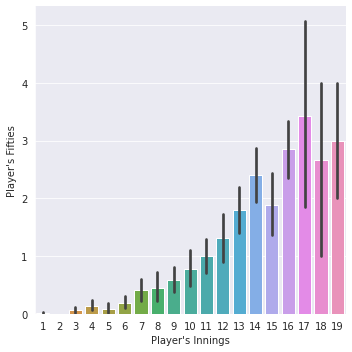

In [ ]:
sns.catplot(x = "Player's Innings", y = "Player's Fifties", data = df, kind = "bar")
plt.show()

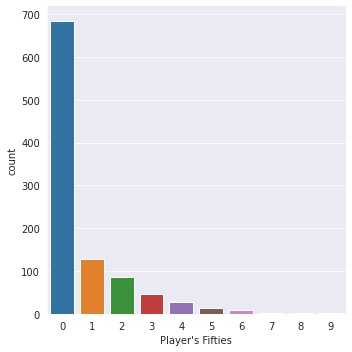

In [ ]:
sns.catplot(x = "Player's Fifties",  data = df, kind = "count")
plt.show()

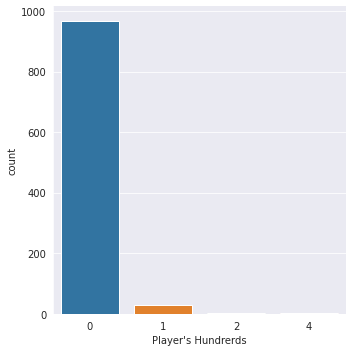

In [ ]:
sns.catplot(x = "Player's Hundrerds",  data = df, kind = "count")
plt.show()

Comparing specific reputed Five palyers


In [ ]:
df1 = df[df["Player's Name"] == "Virat Kohli"]
df2 = df[df["Player's Name"] == "Rohit Sharma"]
df3 = df[df["Player's Name"] == "AB de Villiers"]
df4 = df[df["Player's Name"] == "Chris Gayle"]
df5 = df[df["Player's Name"] == "Shikhar Dhawan"]

frames = [df1, df2, df3, df4, df5]
d_frame = pd.concat(frames)
d_frame.head(12)

,Player's Name,Player's Matchs,Player's Innings,Player's Runs,Player's Highest,Player's Average,Player's Best Figures,Player's Strike Rate,Player's Hundrerds,Player's Fifties,Playre's Fours,Player's sixes
1,Virat Kohli,16,16,557,71,46.41,460,121.08,0,4,55,16
165,Virat Kohli,16,15,364,73,28.00,326,111.65,0,2,33,9
302,Virat Kohli,16,16,634,99,45.28,457,138.73,0,6,64,22
468,Virat Kohli,14,14,359,73,27.61,294,122.10,0,2,23,16
586,Virat Kohli,16,16,505,82,45.90,386,130.82,0,3,35,23
711,Virat Kohli,16,16,973,113,81.08,640,152.03,4,7,83,38
869,Virat Kohli,10,10,308,64,30.80,252,122.22,0,4,23,11
996,Virat Kohli,14,14,530,92,48.18,381,139.10,0,4,52,18
16,Rohit Sharma,16,14,372,87,33.81,297,125.25,0,3,32,13
158,Rohit Sharma,17,16,433,109,30.92,342,126.60,1,3,39,18


Text(0.5, 0, "Player's Name")

Text(0, 0.5, "Player's Runs")

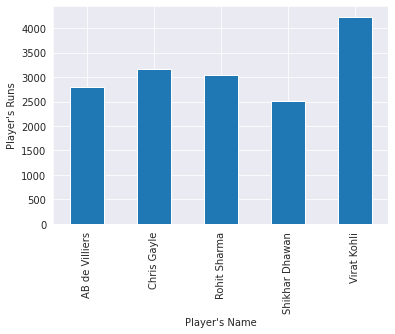

In [ ]:
d_frame.groupby(["Player's Name"])["Player's Runs"].sum().plot.bar()
plt.xlabel("Player's Name")
plt.ylabel("Player's Runs")

Text(0.5, 0, "Player's Name")

Text(0, 0.5, "Player's Average")

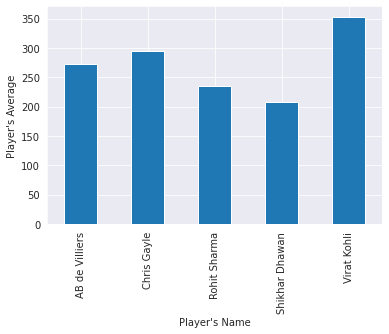

In [ ]:
d_frame.groupby(["Player's Name"])["Player's Average"].sum().plot.bar()
plt.xlabel("Player's Name")
plt.ylabel("Player's Average")

Text(0.5, 1.0, "Player's Strike Rate")

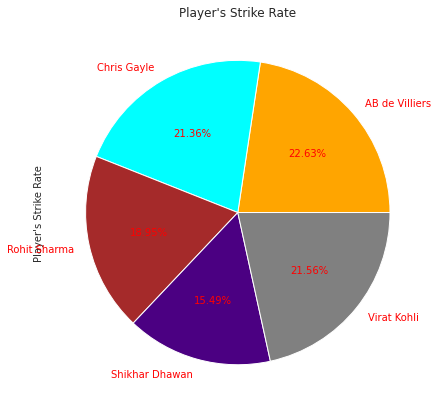

In [ ]:
colors = ( "orange", "cyan", "brown", "indigo", "gray")
fig, ax = plt.subplots(figsize =(10, 7))
d_frame.groupby(["Player's Name"])["Player's Strike Rate"].sum().plot.pie(colors = colors, autopct = "%0.2f%%", textprops = dict(color ="red"))
ax.set_title("Player's Strike Rate")

Text(0.5, 0, "Player's Name")

Text(0, 0.5, "Player's sixes")

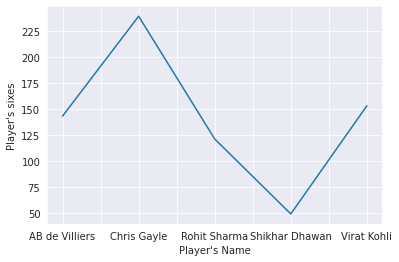

In [ ]:
d_frame.groupby(["Player's Name"])["Player's sixes"].sum().plot.line()
plt.xlabel("Player's Name")
plt.ylabel("Player's sixes")

Text(0.5, 0, "Player's Name")

Text(0, 0.5, "Player's Fou")

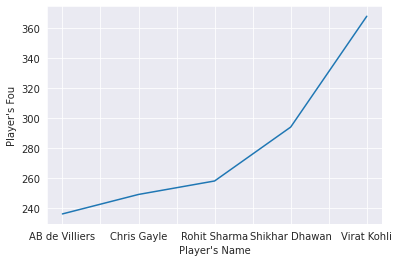

In [ ]:
d_frame.groupby(["Player's Name"])["Playre's Fours"].sum().plot()
plt.xlabel("Player's Name")
plt.ylabel("Player's Fou")